### This notebook is to calculate fantasy points by position

In [70]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#### Passing Fantasy Points

In [71]:
qb = pd.read_csv('nfl_data/weekly/cbs_weekly/passing_through_week-23.csv')
qb.head()

,Player,Game,FPTS Fantasy Points,CMP Pass Completions,ATT Pass Attempts,YDS Passing Yards,TD Touchdown Passes,INT Interceptions Thrown,ATT Rushing Attempts,YDS Rushing Yards,TD Rushing Touchdowns,Week,Pos
0,Josh Allen,BUF 47 - NE 17,48,21,25,308,5,0,6,66,0,19,QB
1,Patrick Mahomes,KC 42 - PIT 21,46,30,39,404,5,1,3,29,0,19,QB
2,Matthew Stafford,LAR 34 - ARI 11,28,13,17,202,2,0,6,22,1,19,QB
3,Dak Prescott,SF 23 - DAL 17,22,23,43,254,1,1,4,27,1,19,QB
4,Tom Brady,TB 31 - PHI 15,22,29,37,271,2,0,0,0,0,19,QB


In [133]:
qb_fantasy_points = {
            'touchdown': 6,
            'pass_yds': 25,
            'interception': -2,
            'rush_yds': 10,
            'rush_td': 6,
        }

In [134]:
qb['Fantasy_Pts'] = qb['TD  Touchdown Passes'].multiply(qb_fantasy_points['touchdown']) + qb['YDS  Passing Yards'].divide(qb_fantasy_points['pass_yds']) + qb['INT  Interceptions Thrown'].multiply(qb_fantasy_points['interception']) + qb['YDS  Rushing Yards'].divide(qb_fantasy_points['rush_yds']) + qb['TD  Rushing Touchdowns'].multiply(qb_fantasy_points['rush_td'])


In [135]:
qb[['Player', 'Fantasy_Pts', 'FPTS  Fantasy Points']].head(10)

,Player,Fantasy_Pts,FPTS Fantasy Points
0,Josh Allen,48.92,48
1,Patrick Mahomes,47.06,46
2,Matthew Stafford,28.28,28
3,Dak Prescott,22.86,22
4,Tom Brady,22.84,22
5,Joe Burrow,21.56,21
6,Ben Roethlisberger,20.50,20
7,Mac Jones,19.08,18
8,Jalen Hurts,16.22,17
9,Derek Carr,18.40,16


In [84]:
qb.to_csv('./modeling_data/passing.csv', index=0)

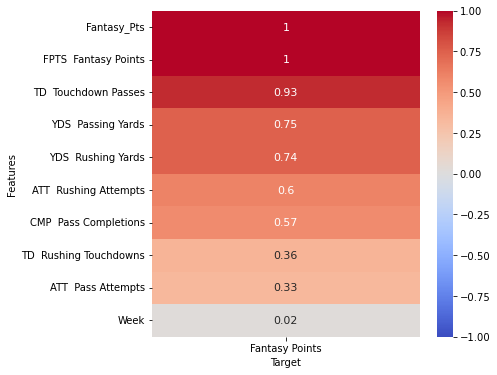

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))
x_axis_labels = ['Fantasy Points',] # labels for x-axis
s = sns.heatmap(qb.corr()[['Fantasy_Pts']].sort_values(by='Fantasy_Pts', ascending=False).head(10), 
                vmin=-1,
                vmax=1,
                xticklabels=x_axis_labels, 
                annot=True,
                annot_kws={'size': 11},
                cmap='coolwarm')
s.set(xlabel='Target', ylabel='Features');

#### Rushing Fantasy Points`

In [86]:
rb = pd.read_csv('nfl_data/weekly/cbs_weekly/rushing_through_week-23.csv')
rb.head()

,Player,Game,FPTS Fantasy Points,ATT Rushing Attempts,YDS Rushing Yards,TD Rushing Touchdowns,REC Receptions,YDS Receiving Yards,TGT Targets,TD Receiving Touchdowns,Week,Pos
0,Devin Singletary,BUF 47 - NE 17,21,16,81,2,3,13,4,0,19,RB
1,Jerick McKinnon,KC 42 - PIT 21,20,12,61,0,6,81,6,1,19,RB
2,Elijah Mitchell,SF 23 - DAL 17,15,27,96,1,1,-11,2,0,19,RB
3,Giovani Bernard,TB 31 - PHI 15,13,13,44,1,5,39,7,0,19,RB
4,Josh Jacobs,CIN 26 - LV 19,12,13,83,0,4,44,5,0,19,RB


In [131]:
rb_fantasy_points = {
            'rush_touchdown': 6,
            'rush_yards': 10,
            'receptions': 1, # ppr
            'rec_yards': 10,
            'rec_touchdown': 6,
        }

In [132]:
rb['Fantasy_Pts'] = rb['TD  Rushing Touchdowns'].multiply(rb_fantasy_points['rush_touchdown']) + rb['YDS  Rushing Yards'].divide(rb_fantasy_points['rush_yards']) + rb['REC  Receptions'].add(rb_fantasy_points['receptions']) + rb['YDS  Receiving Yards'].divide(rb_fantasy_points['rec_yards']) + rb['TD  Receiving Touchdowns'].multiply(rb_fantasy_points['rec_touchdown'])


In [93]:
rb[['Player', 'Fantasy_Pts', 'REC  Receptions', 'FPTS  Fantasy Points']].head(10)

,Player,Fantasy_Pts,REC Receptions,FPTS Fantasy Points
0,Devin Singletary,25.4,3,21
1,Jerick McKinnon,27.2,6,20
2,Elijah Mitchell,16.5,1,15
3,Giovani Bernard,20.3,5,13
4,Josh Jacobs,17.7,4,12
5,Ke'Shawn Vaughn,15.2,2,11
6,Kenneth Gainwell,17.5,5,10
7,Cam Akers,11.5,1,9
8,Boston Scott,11.5,1,9
9,James Conner,10.4,1,7


In [94]:
rb.to_csv('./modeling_data/rushing.csv', index=0)

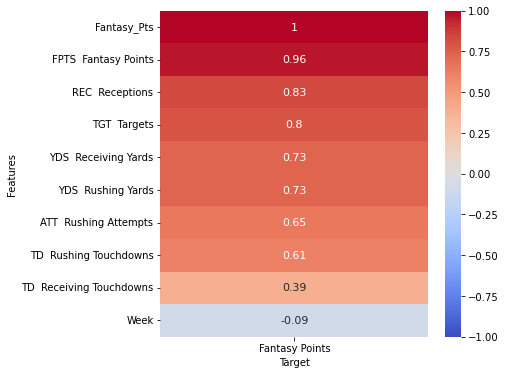

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))
x_axis_labels = ['Fantasy Points',] # labels for x-axis
s = sns.heatmap(rb.corr()[['Fantasy_Pts']].sort_values(by='Fantasy_Pts', ascending=False).head(10), 
                vmin=-1,
                vmax=1,
                xticklabels=x_axis_labels, 
                annot=True,
                annot_kws={'size': 11},
                cmap='coolwarm')
s.set(xlabel='Target', ylabel='Features');

#### Receiving Fantasy Points

In [96]:
wr = pd.read_csv('nfl_data/weekly/cbs_weekly/receiving_through_week-23.csv')
wr.head()

,Player,Game,FPTS Fantasy Points,REC Receptions,YDS Receiving Yards,TGT Targets,TD Receiving Touchdowns,ATT Rushing Attempts,YDS Rushing Yards,TD Rushing Touchdowns,Week,Pos
0,Kendrick Bourne,BUF 47 - NE 17,20,7,77,8,2,1,14,0,19,WR
1,Mike Evans,TB 31 - PHI 15,17,9,117,10,1,0,0,0,19,WR
2,Deebo Samuel,SF 23 - DAL 17,16,3,38,3,0,10,72,1,19,WR
3,Byron Pringle,KC 42 - PIT 21,15,5,37,7,2,0,0,0,19,WR
4,Ja'Marr Chase,CIN 26 - LV 19,13,9,116,12,0,3,23,0,19,WR


In [129]:
wr_fantasy_points = {
            'rec_touchdown': 6,
            'rec_yards': 10,
            'receptions': 1, # ppr
            'rush_yards': 10,
            'rush_touchdown': 6,
        }

In [130]:
wr['Fantasy_Pts'] = wr['TD  Rushing Touchdowns'].multiply(wr_fantasy_points['rush_touchdown']) + wr['YDS  Rushing Yards'].divide(wr_fantasy_points['rush_yards']) + wr['REC  Receptions'].add(wr_fantasy_points['receptions']) + wr['YDS  Receiving Yards'].divide(wr_fantasy_points['rec_yards']) + wr['TD  Receiving Touchdowns'].multiply(wr_fantasy_points['rec_touchdown'])


In [99]:
wr[['Player', 'Fantasy_Pts', 'REC  Receptions', 'FPTS  Fantasy Points']].head(10)

,Player,Fantasy_Pts,REC Receptions,FPTS Fantasy Points
0,Kendrick Bourne,29.1,7,20
1,Mike Evans,27.7,9,17
2,Deebo Samuel,21.0,3,16
3,Byron Pringle,21.7,5,15
4,Ja'Marr Chase,23.9,9,13
5,Amari Cooper,19.4,6,12
6,WR Odell,16.4,4,12
7,Zay Jones,18.1,5,12
8,Cooper Kupp,18.1,5,12
9,Tyreek Hill,17.7,5,11


In [100]:
wr.to_csv('./modeling_data/receiving.csv', index=0)

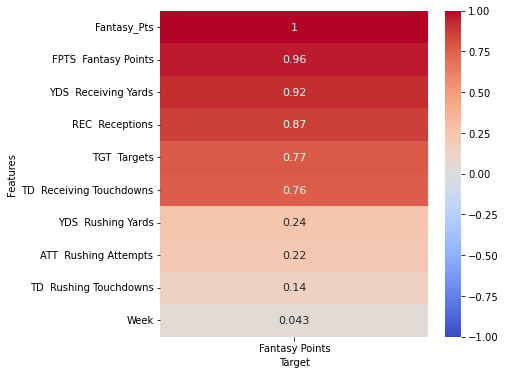

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))
x_axis_labels = ['Fantasy Points',] # labels for x-axis
s = sns.heatmap(wr.corr()[['Fantasy_Pts']].sort_values(by='Fantasy_Pts', ascending=False).head(10),
                vmin=-1,
                vmax=1,
                xticklabels=x_axis_labels, 
                annot=True,
                annot_kws={'size': 11},
                cmap='coolwarm')
s.set(xlabel='Target', ylabel='Features');

#### Tight End Fantasy Points

In [102]:
te = pd.read_csv('nfl_data/weekly/cbs_weekly/tight_ends_through_week-23.csv')
te.head()

,Player,Game,FPTS Fantasy Points,REC Receptions,YDS Receiving Yards,TGT Targets,TD Receiving Touchdowns,ATT Rushing Attempts,YDS Rushing Yards,TD Rushing Touchdowns,Week,Pos
0,Travis Kelce,KC 42 - PIT 21,22,5,108,7,1,0,0,0,19,TE
1,Dawson Knox,BUF 47 - NE 17,20,5,89,5,2,0,0,0,19,TE
2,C.J. Uzomah,CIN 26 - LV 19,12,6,64,6,1,0,0,0,19,TE
3,Dallas Goedert,TB 31 - PHI 15,9,6,92,12,0,0,0,0,19,TE
4,Rob Gronkowski,TB 31 - PHI 15,9,5,31,6,1,0,0,0,19,TE


In [125]:
te_fantasy_points = {
            'rec_touchdown': 6,
            'rec_yards': 10,
            'receptions': 1, # ppr
            'rush_yards': 10,
            'rush_touchdown': 6,
        }

In [126]:
te['Fantasy_Pts'] = te['TD  Rushing Touchdowns'].multiply(te_fantasy_points['rush_touchdown']) + te['YDS  Rushing Yards'].divide(te_fantasy_points['rush_yards']) + te['REC  Receptions'].add(te_fantasy_points['receptions']) + te['YDS  Receiving Yards'].divide(te_fantasy_points['rec_yards']) + te['TD  Receiving Touchdowns'].multiply(te_fantasy_points['rec_touchdown'])


In [105]:
te[['Player', 'Fantasy_Pts', 'REC  Receptions', 'FPTS  Fantasy Points']].head(10)

,Player,Fantasy_Pts,REC Receptions,FPTS Fantasy Points
0,Travis Kelce,22.8,5,22
1,Dawson Knox,26.9,5,20
2,C.J. Uzomah,19.4,6,12
3,Dallas Goedert,16.2,6,9
4,Rob Gronkowski,15.1,5,9
5,Dalton Schultz,16.9,7,8
6,Darren Waller,15.6,7,7
7,Tyler Higbee,8.6,3,4
8,Hunter Henry,5.0,1,3
9,Zach Gentry,8.3,4,3


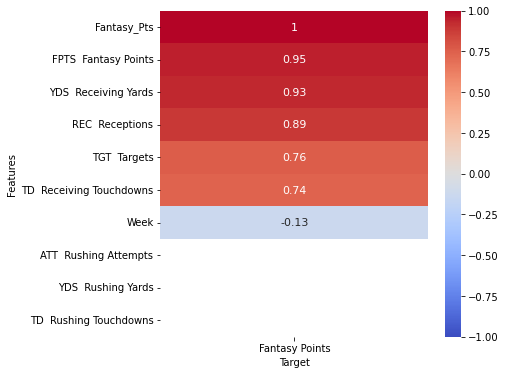

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))
x_axis_labels = ['Fantasy Points',] # labels for x-axis
s = sns.heatmap(te.corr()[['Fantasy_Pts']].sort_values(by='Fantasy_Pts', ascending=False).head(10),
                vmin=-1,
                vmax=1,
                xticklabels=x_axis_labels, 
                annot=True,
                annot_kws={'size': 11},
                cmap='coolwarm')
s.set(xlabel='Target', ylabel='Features');

In [107]:
te.to_csv('./modeling_data/tight_end.csv', index=0)

#### Kicking Fantasy Points

In [108]:
k = pd.read_csv('nfl_data/weekly/cbs_weekly/kicking_through_week-23.csv')
k.head()

,Player,Game,FPTS Fantasy Points,FGM-A Field Goals Made - Field Goals Attempted,LNG Longest field goal in terms of yards by a kicker,XPM-A Extra Points Made - Extra Points Attempted,Week,Pos,FG_Made,FG_Attempted,XPM,XPA,FG_Missed,XP_Missed
0,Evan McPherson,CIN 26 - LV 19,14,4-4,43,2-2,19,K,4,4,2,2,0,0
1,Daniel Carlson,CIN 26 - LV 19,13,4-4,47,1-1,19,K,4,4,1,1,0,0
2,Robbie Gould,SF 23 - DAL 17,11,3-3,53,2-2,19,K,3,3,2,2,0,0
3,Matt Gay,LAR 34 - ARI 11,10,2-2,46,4-4,19,K,2,2,4,4,0,0
4,Ryan Succop,TB 31 - PHI 15,7,1-1,34,4-4,19,K,1,1,4,4,0,0


In [109]:
kicking_fantasy_points = {
            'field_goals_made': 3,
            'field_goals_missed': -1,
            'extra_points_made': 1,
            'extra_points_missed': -1,
        }

In [118]:
k['Fantasy_Pts'] = k['FG_Made'].multiply(kicking_fantasy_points['field_goals_made']) + k['FG_Missed'].multiply(kicking_fantasy_points['field_goals_missed']) + k['XPM'].multiply(kicking_fantasy_points['extra_points_made']) + k['XP_Missed'].multiply(kicking_fantasy_points['extra_points_missed']) 


In [123]:
k[['Player', 'Fantasy_Pts', 'FPTS  Fantasy Points', 'FG_Made', 'FG_Missed', 'XPM', 'XPA']].head(10)

,Player,Fantasy_Pts,FPTS Fantasy Points,FG_Made,FG_Missed,XPM,XPA
0,Evan McPherson,14,14,4,0,2,2
1,Daniel Carlson,13,13,4,0,1,1
2,Robbie Gould,11,11,3,0,2,2
3,Matt Gay,10,10,2,0,4,4
4,Ryan Succop,7,7,1,0,4,4
5,Harrison Butker,6,6,0,0,6,6
6,Greg Zuerlein,5,5,1,0,2,2
7,Nick Folk,5,5,1,0,2,2
8,Tyler Bass,5,5,0,0,5,5
9,Matt Prater,3,3,1,0,0,0


In [121]:
k.to_csv('./modeling_data/kicking.csv', index=0)

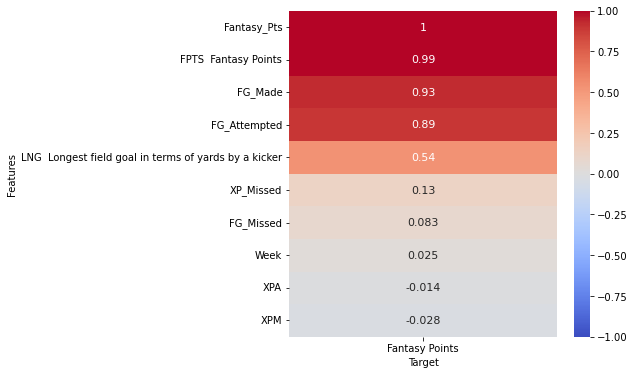

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))
x_axis_labels = ['Fantasy Points',] # labels for x-axis
s = sns.heatmap(k.corr()[['Fantasy_Pts']].sort_values(by='Fantasy_Pts', ascending=False).head(10),
                vmin=-1,
                vmax=1,
                xticklabels=x_axis_labels, 
                annot=True,
                annot_kws={'size': 11},
                cmap='coolwarm')
s.set(xlabel='Target', ylabel='Features');